# Desafio 3

## Importando

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import seaborn as sns
from sklearn.preprocessing import Normalizer, LabelEncoder
import warnings

warnings.filterwarnings('ignore')

def ColabOuCode(path_drive, path_local, ncolunas=None):
    '''
    Importa o DataFrame de acordo com a plataforma usada. Retorna um DataFrame.
    '''
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        df = pd.read_csv(path_drive)
    except:
        if ncolunas is None: df = pd.read_csv(path_local)
        else: df = pd.read_csv(path_local, nrows=ncolunas)
    return df


In [2]:
drive = '/content/drive/MyDrive/Colab Notebooks/TERA-desafio-3/data/fraud_detection_dataset.csv'
local = './data/fraud_detection_dataset.csv'

df = ColabOuCode(drive,local,ncolunas=10)

In [3]:
df.shape


(10, 11)

In [4]:
print(df.info())
print()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10 non-null     int64  
 1   type            10 non-null     object 
 2   amount          10 non-null     float64
 3   nameOrig        10 non-null     object 
 4   oldbalanceOrg   10 non-null     float64
 5   newbalanceOrig  10 non-null     float64
 6   nameDest        10 non-null     object 
 7   oldbalanceDest  10 non-null     float64
 8   newbalanceDest  10 non-null     float64
 9   isFraud         10 non-null     int64  
 10  isFlaggedFraud  10 non-null     int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1008.0+ bytes
None

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
pd.set_option('display.max_columns', 11)
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.rename(columns={'oldbalanceOrg':'oldbalanceOrig'}, inplace=True)


In [7]:
df[df['amount']>700000][df['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [8]:
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10.0,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0
mean,1.0,5588.331000,69083.423000,63630.42800,6308.000000,4034.879000,0.200000,0.0
std,0.0,3976.881304,76459.937539,73956.18987,14166.513285,12759.407723,0.421637,0.0
min,1.0,181.000000,181.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,1.0,2404.300000,7315.500000,4846.18000,0.000000,0.000000,0.000000,0.0
50%,1.0,6222.770000,41637.000000,33134.04500,0.000000,0.000000,0.000000,0.0
75%,1.0,7850.657500,141067.000000,131732.84250,0.000000,0.000000,0.000000,0.0
max,1.0,11668.140000,183195.000000,176087.23000,41898.000000,40348.790000,1.000000,0.0


## Tratamento

<AxesSubplot:xlabel='amount', ylabel='Count'>

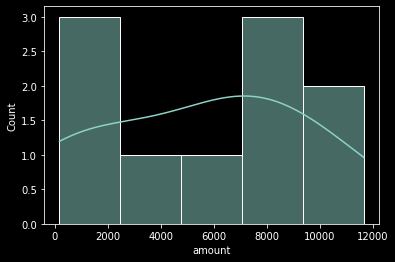

In [9]:
varMonet = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


'''for v in varMonet:
    sns.displot(
        df[v], 
        kde=True,
    )
    plt.show()
'''

sns.histplot(df['amount'][df['amount'] < 50000], kde=True)

<AxesSubplot:xlabel='amount', ylabel='type'>

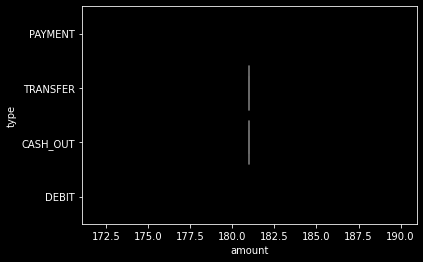

In [10]:
sns.boxplot(
    df['amount'][df['isFraud'] == 1],
    df['type']
)

In [11]:
df.describe(percentiles=(0.9,0.95,0.99))


,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10.0,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0
mean,1.0,5588.331000,69083.423000,63630.42800,6308.000000,4034.879000,0.200000,0.0
std,0.0,3976.881304,76459.937539,73956.18987,14166.513285,12759.407723,0.421637,0.0
min,1.0,181.000000,181.000000,0.00000,0.000000,0.000000,0.000000,0.0
50%,1.0,6222.770000,41637.000000,33134.04500,0.000000,0.000000,0.000000,0.0
90%,1.0,10022.490000,176798.007000,169011.75400,23253.600000,4034.879000,1.000000,0.0
95%,1.0,10845.315000,179996.503500,172549.49200,32575.800000,22191.834500,1.000000,0.0
99%,1.0,11503.575000,182555.300700,175379.68240,40033.560000,36717.398900,1.000000,0.0
max,1.0,11668.140000,183195.000000,176087.23000,41898.000000,40348.790000,1.000000,0.0


In [12]:
def amountCategory(valor):
    if valor >= 50000:
        return 'MUITO ALTO'
    elif 15000 <= valor < 50000:
        return 'ALTO'
    elif 1000 <= valor < 15000:
        return 'MEDIANO'
    elif valor < 1000:
        return 'BAIXO'

df['classAmount'] = None

df['classAmount'] = df['amount'].apply(amountCategory)

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,...,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,classAmount
0,1,PAYMENT,9839.64,C1231006815,170136.0,...,0.0,0.0,0,0,MEDIANO
1,1,PAYMENT,1864.28,C1666544295,21249.0,...,0.0,0.0,0,0,MEDIANO
2,1,TRANSFER,181.00,C1305486145,181.0,...,0.0,0.0,1,0,BAIXO
3,1,CASH_OUT,181.00,C840083671,181.0,...,21182.0,0.0,1,0,BAIXO
4,1,PAYMENT,11668.14,C2048537720,41554.0,...,0.0,0.0,0,0,MEDIANO


In [14]:
# convertendo nameOrig e nameDest para int.
df['nameOrig'] = df['nameOrig'].str[1:]
df['nameDest'] = df['nameDest'].str[1:]

df[['nameOrig','nameDest']] = df[['nameOrig','nameDest']].astype(int)


In [15]:
# Convertendo tempo acumulado em horas do dia
df.loc[df['step'] < 24, 'step'] = df['step'] - 1
df.loc[df['step'] >= 24, 'step'] = df['step'] % 24

df.describe()

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10.0,10.000000,1.000000e+01,10.000000,10.00000,1.000000e+01,10.000000,10.000000,10.000000,10.0
mean,0.0,5588.331000,1.122697e+09,69083.423000,63630.42800,8.834448e+08,6308.000000,4034.879000,0.200000,0.0
std,0.0,3976.881304,6.744317e+08,76459.937539,73956.18987,7.020674e+08,14166.513285,12759.407723,0.421637,0.0
min,0.0,181.000000,9.004564e+07,181.000000,0.00000,3.899701e+07,0.000000,0.000000,0.000000,0.0
25%,0.0,2404.300000,7.443285e+08,7315.500000,4846.18000,4.443679e+08,0.000000,0.000000,0.000000,0.0
50%,0.0,6222.770000,1.248010e+09,41637.000000,33134.04500,6.034068e+08,0.000000,0.000000,0.000000,0.0
75%,0.0,7850.657500,1.576280e+09,141067.000000,131732.84250,1.217259e+09,0.000000,0.000000,0.000000,0.0
max,0.0,11668.140000,2.048538e+09,183195.000000,176087.23000,2.044282e+09,41898.000000,40348.790000,1.000000,0.0


In [16]:
df.rename({'step':'hora'}, axis=1, inplace=True)

In [17]:
df.head()

,hora,type,amount,nameOrig,oldbalanceOrig,...,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,classAmount
0,0,PAYMENT,9839.64,1231006815,170136.0,...,0.0,0.0,0,0,MEDIANO
1,0,PAYMENT,1864.28,1666544295,21249.0,...,0.0,0.0,0,0,MEDIANO
2,0,TRANSFER,181.00,1305486145,181.0,...,0.0,0.0,1,0,BAIXO
3,0,CASH_OUT,181.00,840083671,181.0,...,21182.0,0.0,1,0,BAIXO
4,0,PAYMENT,11668.14,2048537720,41554.0,...,0.0,0.0,0,0,MEDIANO


## AED

<AxesSubplot:xlabel='type', ylabel='count'>

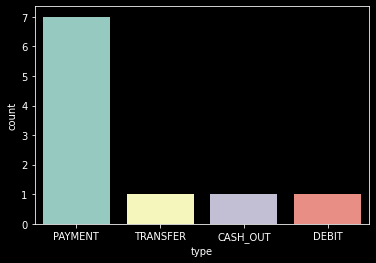

In [18]:
sns.countplot(df['type'])

In [19]:
for t in df.hora.unique():
    print(t)
    print(df['isFraud'][df['hora'] == t].value_counts(normalize=False))
    

0
0    8
1    2
Name: isFraud, dtype: int64


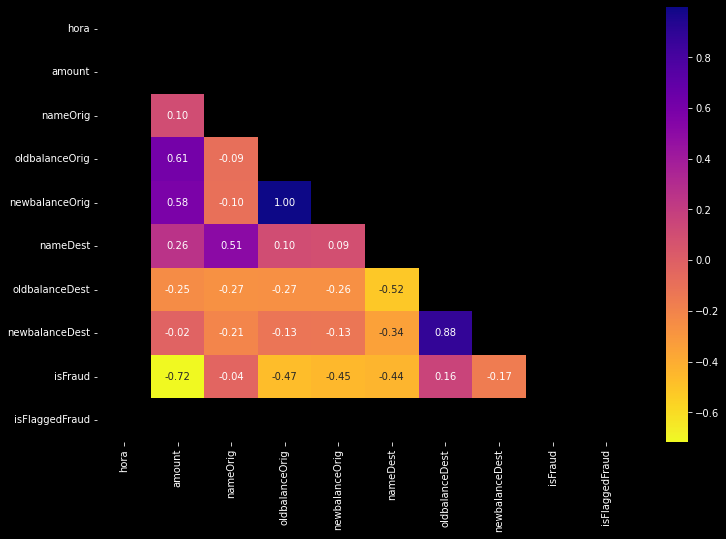

In [20]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))

sns.heatmap(
    df.corr(), 
    annot=True,
    fmt='.2f', 
    cmap='plasma_r', 
    mask=np.triu(np.ones_like(df.corr()))
)

plt.show()


Tanto ```nameOrig``` quanto ```nameDest``` tem valores repetidos. Então vou utilizar estas colunas para criar uma feature que indica se o usuário aparece em alguma outra transação e na mesma posição.

Utilizarei apenas as colunas ```oldbalanceOrig```, ```oldbalanceDest``` e ```amount```.


In [21]:
# Criação de feature
df['destReinc'] = 0
df['origReinc'] = 0

df.loc[df['nameDest'].duplicated(), 'destReinc'] = 1
df.loc[df['nameOrig'].duplicated(), 'origReinc'] = 1


In [22]:
'''
# Criando os dummies
df = pd.get_dummies(df,
                    columns=['type','classAmount'],
                    drop_first=True
)


# Normalizando os valores monetários
normalizar = Normalizer()

quantidade = normalizar.fit_transform(df.amount.values.reshape(1,-1))
df['amount'] = quantidade.reshape(-1,1)

balanceOrig = normalizar.fit_transform(df.amount.values.reshape(1,-1))
df['oldbalanceOrig'] = balanceOrig.reshape(-1,1)

balanceDest = normalizar.fit_transform(df.amount.values.reshape(1,-1))
df['oldbalanceDest'] = balanceDest.reshape(-1,1)
'''

"\n# Criando os dummies\ndf = pd.get_dummies(df,\n                    columns=['type','classAmount'],\n                    drop_first=True\n)\n\n\n# Normalizando os valores monetários\nnormalizar = Normalizer()\n\nquantidade = normalizar.fit_transform(df.amount.values.reshape(1,-1))\ndf['amount'] = quantidade.reshape(-1,1)\n\nbalanceOrig = normalizar.fit_transform(df.amount.values.reshape(1,-1))\ndf['oldbalanceOrig'] = balanceOrig.reshape(-1,1)\n\nbalanceDest = normalizar.fit_transform(df.amount.values.reshape(1,-1))\ndf['oldbalanceDest'] = balanceDest.reshape(-1,1)\n"

In [23]:
# Invertendo os valores para facilitar na visualização das matrizes de confusão
df['isFraud'] = df['isFraud'] - 1
df['isFraud'][df['isFraud'] == -1] = 1

In [24]:
labelEncoder = LabelEncoder()
df['type_label'] = labelEncoder.fit_transform(df['type'])
df['classAmount_label'] = labelEncoder.fit_transform(df['classAmount'])

In [25]:
# Selecionando colunas para continuar

colsSelect = [
    'hora',
#    'type',
    'type_label',
#    'prefixOrig',
    'nameOrig',
    'oldbalanceOrig',
    'origReinc',
    'newbalanceOrig',
#    'prefixDest',
    'nameDest',
    'oldbalanceDest',
    'destReinc',
    'newbalanceDest',
#    'amount',
#    'classAmount',
    'classAmount_label',
    'isFraud',
#    'isFlaggedFraud'
]

df = df[colsSelect]

In [26]:
varMonet = [
    'oldbalanceOrig', 
    'oldbalanceDest',
    'newbalanceDest',
    'newbalanceOrig',
]


for v in varMonet: df[v][df[v] > 0] = np.log(df[v][df[v] > 0])
df.head()


,hora,type_label,nameOrig,oldbalanceOrig,origReinc,...,oldbalanceDest,destReinc,newbalanceDest,classAmount_label,isFraud
0,0,2,1231006815,12.044353,0,...,0.000000,0,0.0,1,1
1,0,2,1666544295,9.964065,0,...,0.000000,0,0.0,1,1
2,0,3,1305486145,5.198497,0,...,0.000000,0,0.0,0,0
3,0,0,840083671,5.198497,0,...,9.960907,0,0.0,0,0
4,0,2,2048537720,10.634749,0,...,0.000000,0,0.0,1,1


In [27]:
df.head()

,hora,type_label,nameOrig,oldbalanceOrig,origReinc,...,oldbalanceDest,destReinc,newbalanceDest,classAmount_label,isFraud
0,0,2,1231006815,12.044353,0,...,0.000000,0,0.0,1,1
1,0,2,1666544295,9.964065,0,...,0.000000,0,0.0,1,1
2,0,3,1305486145,5.198497,0,...,0.000000,0,0.0,0,0
3,0,0,840083671,5.198497,0,...,9.960907,0,0.0,0,0
4,0,2,2048537720,10.634749,0,...,0.000000,0,0.0,1,1


Ressolvi exportar o dataset em CSV e trabalhar a classificação em outro notebook por razões de: **facilita a vida demais**

In [28]:
import os

path = os.path.abspath('./data/dados_tratados.csv')
df.to_csv(
    path,
    index=False
)
